# Конспект книги "Python для сложных задач" Дж. Вандер Плас

## Глава 2. Введение в библиотеку NumPy

Python - язык с динамической типизацией, то есть при работе с переменными нам не приходится явно указывать их тип, машина сама всё определяет. Это упрощает написание кода на Python, но имеет некоторые последствия

Python написан на языке C, поэтому все объекты в Python - некоторая структура на C, например целое число в Python имеет следующую структуру:   
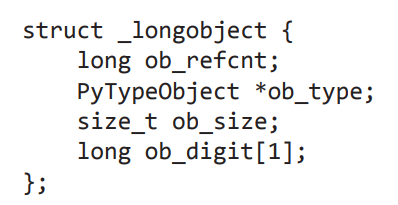     
здесь первые три пункта - счётчик ссылок, код типа и размер, а последнее - само число


То есть при хранение целого числа имеется некоторая избыточность.

Это очень удобно, так как позволяет в структурах языка, содержащих много объектов(например, в списках и множествах), хранить данные разных типов. Рассмотрим на примере списков.

Список в Python хранит указатель на начало списка, длину списка и блок указателей на элементы списка, каждый из которых является полновесной структурой, которая(как мы видили на примере даже целого числа) имеет нетривиальное строение    
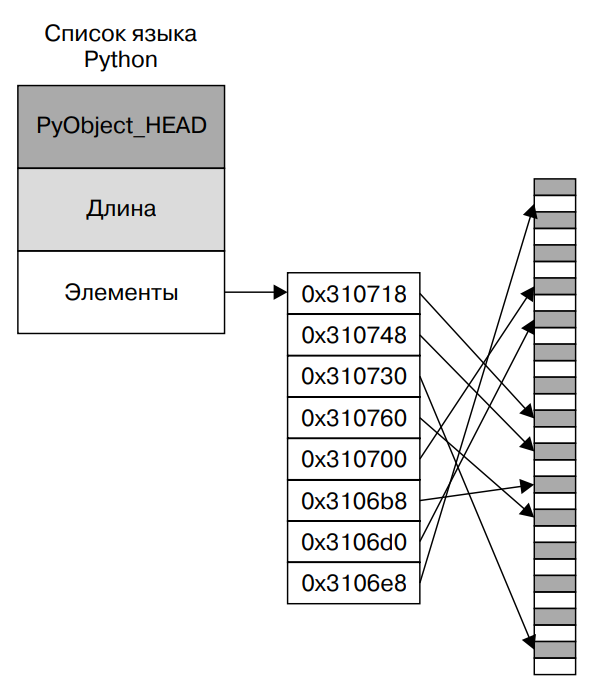

Библиотека NumPy позволяет нам использовать массивы, то есть структуры, содержащие много объектов одного типа, и эффективно выполнять операции над ними 

## Создание массивов из списков языка Python

In [1]:
import numpy as np

np.array используется для создания массива из списка Python

In [2]:
np.array([1, 2, 3, 3, 5, 6])

array([1, 2, 3, 3, 5, 6])

Если типы элементов в списке не совпадают, то NumPy попытается выполнить повышающее приведение типов

In [3]:
np.array([1.1, 1.2, 3, 4, 5.7])

array([1.1, 1.2, 3. , 4. , 5.7])

Можно явно указать тип данных итогового массива

In [4]:
np.array([1, 2, 3], dtype='float32')

array([1., 2., 3.], dtype=float32)

In [5]:
np.array([2.1, 3.4, 6.9], dtype='int')

array([2, 3, 6])

Массив NumPy могут явным образом описываться как многомерные. Например, вложенные списки будут преобразовываться в многомерные массивы

In [6]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
#трёхмерный массив
np.array([[[1, 2], [3, 4]] for _ in range(3)])

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]]])

Есть возможность более эффективно создавать массивы с помощью методов библиотеки

In [8]:
np.zeros(3, dtype=int)

array([0, 0, 0])

In [9]:
np.ones((2, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [10]:
np.full((2, 2, 2), 1.1)

array([[[1.1, 1.1],
        [1.1, 1.1]],

       [[1.1, 1.1],
        [1.1, 1.1]]])

In [11]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [12]:
np.linspace(0, 1, 3)

array([0. , 0.5, 1. ])

In [13]:
np.random.random((2, 4))

array([[0.66470883, 0.4386804 , 0.66755892, 0.38357243],
       [0.86591486, 0.11167002, 0.76696123, 0.87501646]])

In [14]:
#создание массива нормально распределённых случайных чисел
#с медианой 2 и отклонением 3
np.random.normal(2, 3, (7, 2))

array([[ 1.72590769,  0.59715405],
       [ 2.13170375,  3.32016232],
       [ 0.16660392,  5.79893284],
       [ 4.48287538,  6.25962452],
       [ 1.34943052, -4.99084741],
       [ 1.61299451,  4.25391365],
       [-1.05273351, -1.67605179]])

In [15]:
np.random.randint(0, 17, 4)

array([13, 11,  4, 11], dtype=int32)

In [16]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [17]:
np.empty(6)

array([3.33772792e-307, 4.22786102e-307, 2.78145267e-307, 4.00537061e-307,
       9.45656391e-308, 0.00000000e+000])

Приведём пример стандартных типов данных библиотеки   
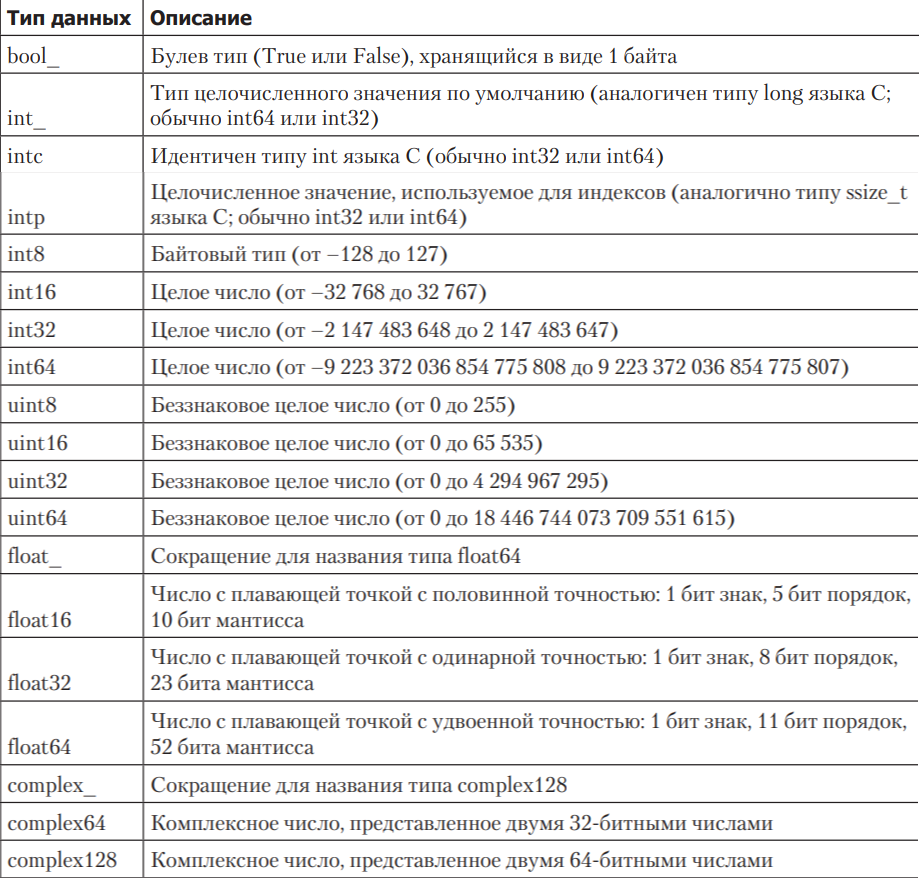

## Операции с массивами

In [18]:
x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size=(6, 6))
x3 = np.random.randint(10, size=(6, 6, 6))

ndim используется для определения размерности массива   
shape используется для определения размера каждого измерения   
size используется для определения количества ячеек в массиве

In [19]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (6, 6, 6)
x3 size:  216


dtype используется для определения типа данных в массиве   
itemsize используется для определени размера одного элемента массива в баятах    
nbytes используется для определения размера всех элементов массива в байтах

In [20]:
print("dtype:", x3.dtype)
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

dtype: int32
itemsize: 4 bytes
nbytes: 864 bytes


Обращение по индексу массива осуществляется в квадратных скобках

In [21]:
x1

array([1, 6, 0, 7, 9, 9], dtype=int32)

In [22]:
x1[0]

np.int32(1)

In [23]:
x1[-2]

np.int32(9)

In [24]:
x1[1] = 0
x1

array([1, 0, 0, 7, 9, 9], dtype=int32)

Если массив многомерный, то обращение происходит по кортежу символов, либо привычным способом

In [25]:
x2

array([[9, 1, 0, 0, 0, 6],
       [9, 6, 7, 7, 0, 0],
       [5, 5, 1, 8, 2, 2],
       [5, 6, 6, 2, 4, 0],
       [4, 1, 6, 0, 1, 3],
       [5, 0, 2, 6, 9, 7]], dtype=int32)

In [26]:
x2[0, 0]

np.int32(9)

In [27]:
x2[0][0]

np.int32(9)

In [28]:
x2[0, -1]

np.int32(6)

In [29]:
#при попытке изменить значение в массиве числом элементом другого типа, проитзойдёт автоматическое понижение типа
x1[0] = 10.1010
x1

array([10,  0,  0,  7,  9,  9], dtype=int32)

Можно обращаться к подмассиву с помощью срезов, происходит это привычным образом по синтаксису x[начало:конец:шаг] (если значение не указать, то будет применено значение по умолчанию: начало - 0, конец - размер соответствующего измерения массива, шаг - 1), причём шаг может быть отрицательным

In [30]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
x[1:7:3]

array([1, 4])

In [32]:
x[:-1:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [33]:
x[:6:-1]

array([9, 8, 7])

In [34]:
x[5::-1]

array([5, 4, 3, 2, 1, 0])

Точно так же всё происходит в многомерных массива, только срезы разделяются запятыми

In [35]:
x2

array([[9, 1, 0, 0, 0, 6],
       [9, 6, 7, 7, 0, 0],
       [5, 5, 1, 8, 2, 2],
       [5, 6, 6, 2, 4, 0],
       [4, 1, 6, 0, 1, 3],
       [5, 0, 2, 6, 9, 7]], dtype=int32)

In [36]:
x2[3::-1, 2:-1:]

array([[6, 2, 4],
       [1, 8, 2],
       [7, 7, 0],
       [0, 0, 0]], dtype=int32)

In [37]:
# : - пустой срез
x2[::3, :]

array([[9, 1, 0, 0, 0, 6],
       [5, 6, 6, 2, 4, 0]], dtype=int32)

In [38]:
x2[::3]

array([[9, 1, 0, 0, 0, 6],
       [5, 6, 6, 2, 4, 0]], dtype=int32)

Срезы позволяют получать доступ к столбцу или строке

In [39]:
print(x2[:, 1])

[1 6 5 6 1 0]


In [40]:
#если нужно получить доступ к строке, пустой срез можно опустить
print(x2[3])

[5 6 6 2 4 0]


В отличии от списков Python, срезы массивов NumPy - это представления, а не копии, а значит производя манипуляции со срезом, соответствующие изменения произойдут и в основном массиве

In [41]:
x2_sub = x2[2::-1, 3:6]
x2_sub

array([[8, 2, 2],
       [7, 0, 0],
       [0, 0, 6]], dtype=int32)

In [42]:
x2_sub[0, 0] = 100
x2

array([[  9,   1,   0,   0,   0,   6],
       [  9,   6,   7,   7,   0,   0],
       [  5,   5,   1, 100,   2,   2],
       [  5,   6,   6,   2,   4,   0],
       [  4,   1,   6,   0,   1,   3],
       [  5,   0,   2,   6,   9,   7]], dtype=int32)

Но возможность создать копию, а не представление, осталась. Для этого используется метод copy()

In [43]:
x2_sub_copy = x2[2::-1, 3:6].copy()
print(x2_sub_copy)

[[100   2   2]
 [  7   0   0]
 [  0   0   6]]


In [44]:
x2_sub_copy[0, 0] = -100
print(x2)

[[  9   1   0   0   0   6]
 [  9   6   7   7   0   0]
 [  5   5   1 100   2   2]
 [  5   6   6   2   4   0]
 [  4   1   6   0   1   3]
 [  5   0   2   6   9   7]]


Метод reshape() используется для изменения формы массива

In [45]:
x = np.arange(1, 17)
x.reshape((4, 4))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [46]:
x.reshape((2, 8))

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16]])

In [47]:
x.reshape((2, 2, 4))

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8]],

       [[ 9, 10, 11, 12],
        [13, 14, 15, 16]]])

In [48]:
x.reshape((2, 2, 2, 2))

array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]]],


       [[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]]])

reshape позволяет переделать одномерный массив в вектор-строку или вектор-столбец, но лучше использовать newaxis

In [49]:
y = x[np.newaxis, :].copy()
y

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [50]:
y = x[:3, np.newaxis].copy()
y

array([[1],
       [2],
       [3]])

concatenate используется для слияния нескольких массивов

In [51]:
x = np.arange(3)
y = np.arange(3, 6)
z = [6, 7, 8]

In [52]:
np.concatenate([x, y, z])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

В качестве второго аргумента axis пишется ось, по которой происходит слияние многомерных массивов

In [53]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [54]:
np.concatenate([grid, grid], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [55]:
grid = np.random.randint(10, size=(3, 3, 3))
grid

array([[[3, 7, 3],
        [4, 8, 8],
        [7, 7, 3]],

       [[9, 3, 7],
        [0, 6, 7],
        [1, 0, 1]],

       [[8, 4, 3],
        [8, 3, 0],
        [9, 4, 0]]], dtype=int32)

In [56]:
np.concatenate([grid, grid], axis=2)

array([[[3, 7, 3, 3, 7, 3],
        [4, 8, 8, 4, 8, 8],
        [7, 7, 3, 7, 7, 3]],

       [[9, 3, 7, 9, 3, 7],
        [0, 6, 7, 0, 6, 7],
        [1, 0, 1, 1, 0, 1]],

       [[8, 4, 3, 8, 4, 3],
        [8, 3, 0, 8, 3, 0],
        [9, 4, 0, 9, 4, 0]]], dtype=int32)

In [57]:
np.concatenate([grid, grid], axis=1)

array([[[3, 7, 3],
        [4, 8, 8],
        [7, 7, 3],
        [3, 7, 3],
        [4, 8, 8],
        [7, 7, 3]],

       [[9, 3, 7],
        [0, 6, 7],
        [1, 0, 1],
        [9, 3, 7],
        [0, 6, 7],
        [1, 0, 1]],

       [[8, 4, 3],
        [8, 3, 0],
        [9, 4, 0],
        [8, 4, 3],
        [8, 3, 0],
        [9, 4, 0]]], dtype=int32)

In [58]:
np.concatenate([grid, grid, grid], axis=2)

array([[[3, 7, 3, 3, 7, 3, 3, 7, 3],
        [4, 8, 8, 4, 8, 8, 4, 8, 8],
        [7, 7, 3, 7, 7, 3, 7, 7, 3]],

       [[9, 3, 7, 9, 3, 7, 9, 3, 7],
        [0, 6, 7, 0, 6, 7, 0, 6, 7],
        [1, 0, 1, 1, 0, 1, 1, 0, 1]],

       [[8, 4, 3, 8, 4, 3, 8, 4, 3],
        [8, 3, 0, 8, 3, 0, 8, 3, 0],
        [9, 4, 0, 9, 4, 0, 9, 4, 0]]], dtype=int32)

Для слияния массивов разных размеров используются функции np.vstack(вертикальное объединение) и np.hstack(горизонтальное объединение)

In [59]:
x = np.array([1, 2])
y = np.array([[3, 4], [5, 6]])
np.vstack([x, y])

array([[1, 2],
       [3, 4],
       [5, 6]])

In [60]:
np.hstack([y, np.vstack([x, x])])

array([[3, 4, 1, 2],
       [5, 6, 1, 2]])

Для объединения по 3ей оси используется np.dstack

Так же в библиотеке присутствуют функции для разбиения массивов: np.split, np.hsplit, np.vsplit, крирые принимают разбиваемый массив и индексы, задающие точки разбиения

In [61]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
x1, x2, x3 = np.split(x, [3, 6])
x1, x2, x3

(array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9]))

In [62]:
grid = np.arange(16).reshape((2, 8))
upper, lower = np.vsplit(grid, [1])
print(upper, lower)

[[0 1 2 3 4 5 6 7]] [[ 8  9 10 11 12 13 14 15]]


In [63]:
left, right = np.hsplit(grid, [3])
print(left)
print(right)

[[ 0  1  2]
 [ 8  9 10]]
[[ 3  4  5  6  7]
 [11 12 13 14 15]]


## Выполнение вычислений над массивами библиотеки NumPy: универсальные функции

Циклы в Python работают очень медленно, так как на каждой итерации цикла происходит проверка типов и диспетчеризация функций(то есть поиск подходящих под тип объектов функций)

In [64]:
def func_for_test(arr):
    output = np.empty(len(arr))
    for i in range(len(arr)):
        output[i] = 1.0 / arr[i]
    return output

arr = np.random.randint(1, 100, size=1_000_000)
%timeit func_for_test(arr)

1.85 s ± 97.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


То есть для выполнения функции с циклом на всего миллион итераций потребовала больше секунды времени

Библиотека NumPy предоставляет возможность использовать универсальные функции для выполнения операций над массивами со статической типизацией. Их главная задача состоит в быстром выполнении повторяющихся операций над элементами из массивов NumPy

Рассмотрим так называемые векторизованные операции - интерфейс, позволяющий выполнить операцию с массивом, которая потом будет применена к каждому его элементу.

In [65]:
values = np.random.randint(1, 10, 5)
print(values)
print(func_for_test(values))
print(1 / values)

[1 3 6 4 4]
[1.         0.33333333 0.16666667 0.25       0.25      ]
[1.         0.33333333 0.16666667 0.25       0.25      ]


In [66]:
%timeit 1 / arr

7.79 ms ± 415 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Подобным образом можно выполнять операции над двумя массивами

In [67]:
arr1 = np.random.randint(1, 10, 5)
arr2 = np.random.randint(5, 10, 5)
print(arr1, arr2)
print(arr1 * arr2)

[6 6 5 1 6] [7 5 6 9 9]
[42 30 30  9 54]


С многомерными массивами это тоже работает

In [68]:
grid = np.random.randint(1, 10, (2, 2))
print(grid)
print(2 ** grid)

[[5 5]
 [4 2]]
[[32 32]
 [16  4]]


In [69]:
(-grid * 2 + 1) // 3

array([[-3, -3],
       [-3, -1]], dtype=int32)

Вместо операторов можно использовать эквивалентные им универсальные функции   
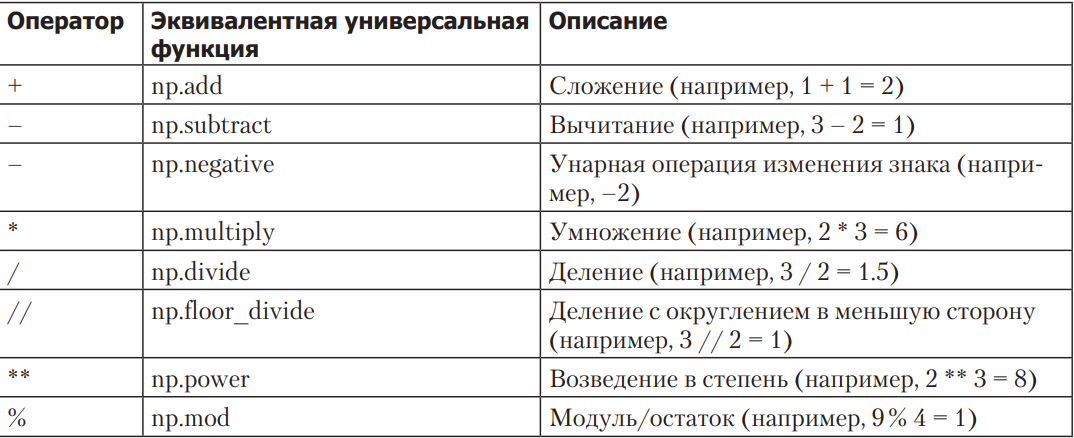

Так же NumPy понимает функцию взятия абсолютного значения

In [70]:
grid = np.random.uniform(-5, 5, (3, 3))
print(grid)
print(np.abs(grid))

[[-2.27324857 -0.93543234  2.68276376]
 [-0.69332625  3.52758382  0.34213867]
 [ 1.08849817  3.57487077  4.99982345]]
[[2.27324857 0.93543234 2.68276376]
 [0.69332625 3.52758382 0.34213867]
 [1.08849817 3.57487077 4.99982345]]


Эта функция работает даже с комплексными числами

Есть возможность вычислять тригонометрические функции от массивов

In [71]:
theta = np.linspace(-np.pi, np.pi, 5)
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [-3.14159265 -1.57079633  0.          1.57079633  3.14159265]
sin(theta) =  [-1.2246468e-16 -1.0000000e+00  0.0000000e+00  1.0000000e+00
  1.2246468e-16]
cos(theta) =  [-1.000000e+00  6.123234e-17  1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 1.22464680e-16 -1.63312394e+16  0.00000000e+00  1.63312394e+16
 -1.22464680e-16]


In [72]:
x = np.linspace(-1, 1, 3)
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))
print("x = ", np.arctan(np.tan(x)))

x =  [-1.  0.  1.]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]
x =  [-1.  0.  1.]


Есть возможность вычислять показательные функции и логарифмы

In [73]:
x = np.arange(5)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("5^x =", np.power(5, x))

e^x = [ 1.          2.71828183  7.3890561  20.08553692 54.59815003]
2^x = [ 1.  2.  4.  8. 16.]
5^x = [  1   5  25 125 625]


In [74]:
x = np.array([1, 2, 4, 10, 100])
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))
print("log5(x) =", np.log(x) / np.log(5))

x = [  1   2   4  10 100]
ln(x) = [0.         0.69314718 1.38629436 2.30258509 4.60517019]
log2(x) = [0.         1.         2.         3.32192809 6.64385619]
log10(x) = [0.         0.30103    0.60205999 1.         2.        ]
log5(x) = [0.         0.43067656 0.86135312 1.43067656 2.86135312]


Имеются функции, дающие более точные значения экспоненты и логарифма при малых аргументах

In [75]:
x = np.array([0, 0.1, 0.01, 0.001])
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.10517092 0.01005017 0.0010005 ]
log(1 + x) = [0.         0.09531018 0.00995033 0.0009995 ]


Так же в библиотеке реализованы многие другие функции, например гамма-функция, бета-функция, гиперболические тригонометрические функции, преобразование из радианов в градусы, функция ошибок и др

Для сохранения результатов вычислений, можно указывать выходной массив в аргументе out, причём в качестве аргумента можно указывать даже представления массивов

In [76]:
x = np.arange(5)
y = np.empty(10)
np.divide(x, 5, out=y[:5])
y

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. ])

In [77]:
#тут создаётся временный массив для хранения результата x / 5 и потом значения из него копируются в y
x = np.arange(5)
y = np.empty(10)
y[:5] = x / 5
y

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. ])

reduce миногократно применяет заданную бинарную функцию к элементам массива до тех пор, пока не останется только один элемент   
accumulate действует аналогично, только сохраняет промежуточные результаты

In [78]:
#результат будет 2 ** 3 ** 4
x = np.arange(2, 5)
print(np.power.reduce(x))

4096


In [79]:
print(np.power.accumulate(x))

[   2    8 4096]


Метод outer позволяет выводить результат применения универсальной функции ко всем пара двух аргументов

In [80]:
x = np.arange(5, 51, 5)
y = np.array([5, 10, 50])
print(np.divide.outer(x, y))


[[ 1.   0.5  0.1]
 [ 2.   1.   0.2]
 [ 3.   1.5  0.3]
 [ 4.   2.   0.4]
 [ 5.   2.5  0.5]
 [ 6.   3.   0.6]
 [ 7.   3.5  0.7]
 [ 8.   4.   0.8]
 [ 9.   4.5  0.9]
 [10.   5.   1. ]]


## Агрегирование: минимум, максимум и все, что посередине

np.sum вычисляет сумму элементов в массиве, работает с многомерными массивами. Она работает быстрее стандартной функции sum, так как выполняется в скомпилированном коде

In [81]:
x = np.random.random(1000)
y = np.random.random((10, 10, 10))
print(np.sum(x))
print(np.sum(y))

496.4136027758617
500.1488367819808


np.min и np.max вычисляют соответственно минимум и максимум в массиве

In [82]:
print(np.min(y), np.max(y))

0.0023460897918730073 0.999877042307556


sum, min и max можно использовать как методы массива

In [83]:
print(x.sum(), x.min(), x.max())

496.4136027758617 0.0006341064359334236 0.9995627407118012


Если указать значение аргумента axis, то можно вычислять эти функции по строкам и столбцам в массиве

In [84]:
x = np.random.randint(1, 100, size=(3, 3))
print(x)

[[46 82 37]
 [89 54 24]
 [75 88  1]]


In [85]:
print(x.min(axis=0))

[46 54  1]


In [86]:
print(x.max(axis=1))

[82 89 88]


Приведём список некоторых других агрегирующих функций   
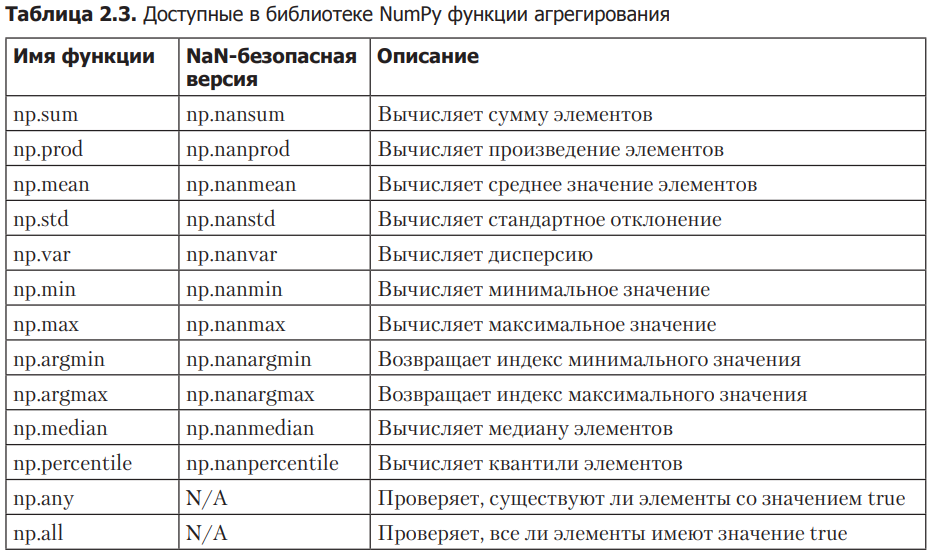

## Операции над массивами. Транслирование

Транслирование - набор правил по применению бинарных универсальных функций к массивам различного размера

In [87]:
# если массивы одного размера, то операция применяется поэлементно
print(np.array([1, 2, 3]) * np.array([4, 5, 6]))

[ 4 10 18]


In [88]:
# простое число рассматривается как нульмерный массив
print(np.array([1, 2, 3]) * 5)

[ 5 10 15]


То есть транслирование как бы растягивает число 5 в массив [5, 5, 5]

In [89]:
# пример умножения двумерного массива на одномерный
print(np.eye(3) + np.array([1, 2, 3]))

[[2. 2. 3.]
 [1. 3. 3.]
 [1. 2. 4.]]


In [90]:
print(np.array([1, 2, 3] + np.eye(3)))

[[2. 2. 3.]
 [1. 3. 3.]
 [1. 2. 4.]]


In [91]:
print(np.array([1, 2, 3]) * np.array([[1, 2, 3], [4, 5, 6]]))

[[ 1  4  9]
 [ 4 10 18]]


Эти примеры используют транслирование одного массива, но может быть так, что будут транслированы оба массива

In [92]:
a = np.arange(0, 11, 2.5)
b = np.arange(5)[:, np.newaxis]
print(a)
print(b)

[ 0.   2.5  5.   7.5 10. ]
[[0]
 [1]
 [2]
 [3]
 [4]]


In [93]:
print(a + b)

[[ 0.   2.5  5.   7.5 10. ]
 [ 1.   3.5  6.   8.5 11. ]
 [ 2.   4.5  7.   9.5 12. ]
 [ 3.   5.5  8.  10.5 13. ]
 [ 4.   6.5  9.  11.5 14. ]]


In [94]:
print(a * b)

[[ 0.   0.   0.   0.   0. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   5.  10.  15.  20. ]
 [ 0.   7.5 15.  22.5 30. ]
 [ 0.  10.  20.  30.  40. ]]


Приведём правила транслирования:   
Правило 1: если размерность двух массивов отличается, форма массива с меньшей размерностью дополняется единицами с ведущей (левой) стороны.   
Правило 2: если форма двух массивов не совпадает в каком-то измерении, массив с формой, равной 1 в данном измерении, растягивается вплоть до соответствия форме другого массива.    
Правило 3: если в каком-либо измерении размеры массивов различаются и ни один не равен 1, генерируется ошибка.

Рассмотрим правила подробнее

In [95]:
M = np.ones((2, 2, 5))
a = np.arange(5)

In [96]:
print(M.shape)
print(a.shape)

(2, 2, 5)
(5,)


По правилу 1 массив меньшей размерности, то есть а, дополняется единицами слева, то есть становится размера (1, 1, 5)

По правилу 2 массивы растягиваются чтобы соответствовать друг другу, то есть массив а становится размера (2, 2, 5)

In [97]:
print(M + a)

[[[1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]]

 [[1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]]]


Если бы у массива М третье измерение было размера 4(или вообще отличалось от 5 и 1), то программа выдала бы ошибку

In [98]:
M = np.ones((2, 2, 4))
a = np.arange(5)
print(a + M)

ValueError: operands could not be broadcast together with shapes (5,) (2,2,4) 

Вернёмся к примеру с массивами разных размеров

In [99]:
a = np.arange(0, 11, 2.5)
b = np.arange(5)[:, np.newaxis]
print(a)
print(b)

[ 0.   2.5  5.   7.5 10. ]
[[0]
 [1]
 [2]
 [3]
 [4]]


In [100]:
print(a.shape)
print(b.shape)

(5,)
(5, 1)


По правилу 1 массив а становится размеров (1, 5)

По правилу 2 оба массива становятся размера (5, 5)

Это мы и видели

Надо упомянуть, что на самом деле эти растягивания не происходят и доп память под них не выделяется, но так нужно себе предсавлять для определения правильности работы кода

### Центрирование массива с помощью транслирования

Пусть у нас имеется 20 наблюдений, каждое из которых состоит из 5 значений

In [101]:
X = np.random.random((20, 5))

Сначала вычислим среднее каждого значения

In [102]:
Xmean = X.mean(axis=0)
print(Xmean)

[0.46871703 0.565487   0.52203807 0.61024649 0.46322498]


И отцентрируем массив, используя транслирование

In [103]:
X_centered = np.empty((20, 5))
np.subtract(X, Xmean, out=X_centered)
print(X_centered.mean(axis=0))

[ 7.21644966e-17  6.66133815e-17  6.10622664e-17 -6.66133815e-17
  6.66133815e-17]


## Сравнения, маски и булева логика

Оказывается, что универсальные функции работают не только с арифметическими функциями, но и с операторами сравнения

In [104]:
grid = np.random.randint(1, 11, (3, 3))
grid

array([[4, 8, 5],
       [7, 6, 5],
       [9, 4, 9]], dtype=int32)

In [105]:
grid == 1

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [106]:
grid < 5

array([[ True, False, False],
       [False, False, False],
       [False,  True, False]])

In [107]:
grid >= 1

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Можно использовать поэлементное сравнение двух массивов

In [108]:
(3 * grid) >= ((grid + 10) / 2)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Приведём список эквивалентных этим операторам универсальных функций    
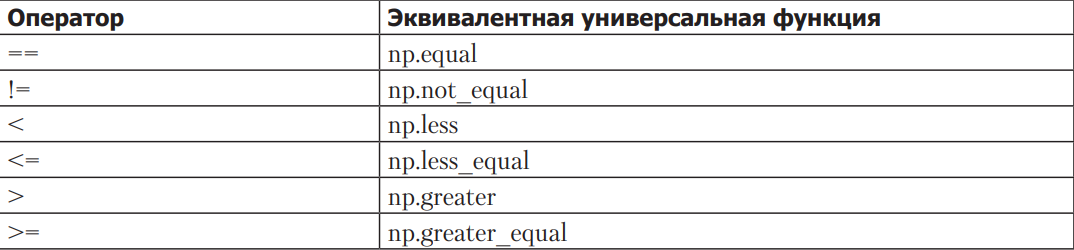

In [109]:
res = np.empty((3, 3), dtype=bool)
np.equal(grid, 1, out=res)
res

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

np.count_nonzero() используется для подсчёта количества элементов True в булевом массиве    
Для этих же целей можно использовать np.sum, его преимущество в том, что можно подсчитать количество истинных значений по строкам или столбцам

In [110]:
np.count_nonzero(2 * grid < 5)

0

In [111]:
np.sum(2 * grid < 5)

np.int64(0)

In [112]:
print(grid)
np.sum(2 * grid < 5, axis=0)

[[4 8 5]
 [7 6 5]
 [9 4 9]]


array([0, 0, 0])

np.any() используется для проверки существования хоть одного истинного значения в массиве
np.all() используется для проверки того, что все элементы истины
обе команды можно использовать по конкретным осям

In [113]:
grid

array([[4, 8, 5],
       [7, 6, 5],
       [9, 4, 9]], dtype=int32)

In [114]:
np.any(grid < 1)

np.False_

In [115]:
np.any(grid > 5)

np.True_

In [116]:
np.any(grid > 5, axis = 1)

array([ True,  True,  True])

In [117]:
np.all(grid >= 1)

np.True_

Так же библиотека поддерживает побитовые логические операторы (привычные and, or и not не будут работать, потому что они рассматривают массив как целую сущность. Они вычисляют единое булево значение, в то время как(в том числе в обычном Python) операторы & | работают отдельно с составляющими структуры, для целых чисел - это биты в двоичной записи, а для массивов NumPy - элементы массива)

In [118]:
(grid > 1) & (grid < 7)

array([[ True, False,  True],
       [False,  True,  True],
       [False,  True, False]])

In [119]:
np.count_nonzero((grid > 1) & (grid < 7))

5

Приведём таблицу эквивалентных универсальных функция    
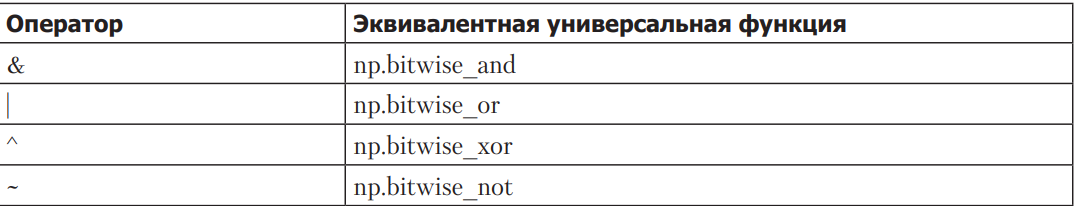

В библиотеке есть возможность использовать булевы массивы как маски. Например, можно составить массив из тех значений исходного массива, которые удовлетворяют некоторому условию. Такая операция называется наложением маски или маскированием

In [120]:
print(grid[(grid > 1) & (grid < 7)])

[4 5 6 5 4]


## «Прихотливая» индексация

Суть "прихотливой" индексации в том, что мы можем передать в качестве индекса целый массив

In [121]:
x = np.arange(100, 111)
ind = np.random.randint(0, 10, size=3)
print(ind)

[0 3 5]


In [122]:
print(x[ind])

[100 103 105]


Причём массив индексов может быть многомерным, результат будет иметь ту же форму, что и массив индексов

In [123]:
ind = np.random.randint(0, 10, size=(3, 3))
print(ind)

[[4 4 8]
 [3 2 7]
 [6 6 7]]


In [124]:
print(x[ind])

[[104 104 108]
 [103 102 107]
 [106 106 107]]


Многомерным может быть и индексируемый массив

In [125]:
x = np.arange(9).reshape((3, 3))
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [126]:
row = np.random.randint(0, 3, size=3)
col = np.random.randint(0, 3, size=3)
print(row)
print(col)

[0 2 1]
[1 2 2]


In [127]:
print(x[row, col])

[1 8 5]


В случае, когда массивы индексов имеют разные размеры, они будут приведены к одной форму в соответствие с правилами транслирования

In [128]:
print(x[row[:, np.newaxis], col])

[[1 2 2]
 [7 8 8]
 [4 5 5]]


Результат выше соответствует массиву индексов(вместо умножения мысленно представляем декартово произведение)

In [129]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 4, 4],
       [1, 2, 2]], dtype=int32)

"Прихотливую" индексацию можно использовать совместно с другими методами индексации

Можно совместно использовать простые индексы и "прихотливую" индексацию

In [130]:
grid = np.arange(0, 12).reshape((3, 4))
print(grid)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [131]:
row = np.array([1, 2])
print(grid[row, 3])

[ 7 11]


In [132]:
print(grid[row[:, np.newaxis], 3])

[[ 7]
 [11]]


Можно использовать "прихотливую" индексацию вместе со срезами

In [133]:
print(grid[row, ::2])

[[ 4  6]
 [ 8 10]]


Можно использовать "прихотливую" индексацию и маскирование

In [134]:
mask = np.array([1, 1, 0, 1], dtype=bool)
print(grid[row[:, np.newaxis], mask])

[[ 4  5  7]
 [ 8  9 11]]


"Прихотливая" индексаця позволяет модифицировать часть массива

In [135]:
x = np.zeros(10)
ind = np.array([2, 5, 7])

In [136]:
x[ind] = 7
x

array([0., 0., 7., 0., 0., 7., 0., 7., 0., 0.])

In [137]:
x[ind] += 1
x

array([0., 0., 8., 0., 0., 8., 0., 8., 0., 0.])

In [138]:
x[ind] = [1, 2, 3]
x

array([0., 0., 1., 0., 0., 2., 0., 3., 0., 0.])

В случае повторяющихся индексов всё плохо

In [139]:
x = np.zeros(10)
ind = np.array([1, 1, 1])
x[ind] = [1, 2, 3]
x

array([0., 3., 0., 0., 0., 0., 0., 0., 0., 0.])

Сначала x[1] стало 1, потом 2, потом 3. Тут всё логично, но

In [140]:
x[ind] += 1
x

array([0., 4., 0., 0., 0., 0., 0., 0., 0., 0.])

Можно было ожидать, что x[1] будет 6, но на самом деле один раз вычислилось значение x[1] + 1, и потом оно три раза присвоилось x[1]

Метод at() позволяет ожидать от программы именно той логики, которая описана выше

In [141]:
x = np.zeros(10)
ind = np.array([1, 1, 1])
np.add.at(x, ind, [1, 2, 3])
x

array([0., 6., 0., 0., 0., 0., 0., 0., 0., 0.])

Аналогично методу reduce, но по заданным индексами сегментам, действует метод reduceat(если два соседних индекса одинаковые, то результат - просто элемент стоящий под этим идексом)

In [142]:
x = np.arange(5)
ind = np.array([1, 1, 3])
np.add.reduceat(x, ind)

array([1, 3, 7])

## Сортировка массивов

np.sort - просто quicksort массива

In [143]:
x = np.random.randint(0, 100, 10)
print(x)
print(np.sort(x))

[98 86 23 61 88 85 94 16  8 83]
[ 8 16 23 61 83 85 86 88 94 98]


Функция np.sort возвращает новый массив, полученный на основе поданного, но не меняет исходный. Чтобы отсортировать исходный массив нужно применять метод sort 

In [144]:
print(x)
x.sort()
print(x)

[98 86 23 61 88 85 94 16  8 83]
[ 8 16 23 61 83 85 86 88 94 98]


Функция np.argsort возвращает индексы отсортированного массива, не меняя сам массив

In [145]:
x = np.random.randint(0, 100, 10)
ind = np.argsort(x)
print(ind)
print(x[ind])

[0 2 7 5 4 3 8 9 1 6]
[ 0  6  9 14 22 42 50 58 89 99]


Есть возможность сортировать массивы по измерениям, например по строкам и столбцам

In [146]:
grid = np.random.randint(0, 100, (10, 10))
np.sort(grid, axis = 0)

array([[ 0, 24,  1,  1,  5,  4,  3, 11, 16, 18],
       [ 1, 28,  2, 26, 12, 10, 24, 17, 19, 19],
       [ 4, 50,  9, 38, 37, 16, 26, 21, 27, 37],
       [ 5, 57, 16, 51, 41, 31, 27, 25, 34, 45],
       [ 6, 59, 18, 64, 45, 45, 36, 37, 34, 53],
       [21, 67, 39, 69, 58, 47, 48, 77, 37, 60],
       [60, 68, 43, 77, 62, 56, 51, 82, 42, 65],
       [71, 78, 44, 88, 62, 71, 55, 83, 61, 66],
       [80, 85, 92, 95, 71, 72, 68, 88, 72, 69],
       [82, 89, 94, 98, 79, 93, 94, 98, 91, 81]], dtype=int32)

In [147]:
np.sort(grid, axis = 1)

array([[ 0,  9, 27, 28, 37, 38, 45, 72, 79, 88],
       [ 2,  4, 19, 26, 37, 37, 53, 60, 78, 95],
       [ 1,  5, 11, 31, 34, 68, 69, 82, 89, 94],
       [ 5, 12, 16, 24, 36, 37, 44, 45, 51, 77],
       [ 4, 18, 34, 51, 57, 58, 65, 71, 83, 88],
       [21, 24, 39, 47, 62, 71, 72, 77, 81, 85],
       [ 1,  1, 66, 67, 71, 82, 91, 93, 94, 98],
       [ 6, 16, 17, 26, 27, 43, 48, 50, 60, 62],
       [ 3, 19, 21, 45, 56, 61, 64, 68, 92, 98],
       [10, 16, 18, 25, 41, 42, 55, 59, 69, 80]], dtype=int32)

In [148]:
np.sort(np.sort(grid, axis=0), axis=1)

array([[ 0,  1,  1,  3,  4,  5, 11, 16, 18, 24],
       [ 1,  2, 10, 12, 17, 19, 19, 24, 26, 28],
       [ 4,  9, 16, 21, 26, 27, 37, 37, 38, 50],
       [ 5, 16, 25, 27, 31, 34, 41, 45, 51, 57],
       [ 6, 18, 34, 36, 37, 45, 45, 53, 59, 64],
       [21, 37, 39, 47, 48, 58, 60, 67, 69, 77],
       [42, 43, 51, 56, 60, 62, 65, 68, 77, 82],
       [44, 55, 61, 62, 66, 71, 71, 78, 83, 88],
       [68, 69, 71, 72, 72, 80, 85, 88, 92, 95],
       [79, 81, 82, 89, 91, 93, 94, 94, 98, 98]], dtype=int32)

np.partition принимает на вход массив и число k, возвращает массив, на k-ом месте стоит k-ое по величине число массива, слева от него стоят все числа меньше него в произвольном порядке, справа - все числа, которые больше или равны его. Есть так же функция np.argpartition. Можно сортировать и по измерениям многомерного массива

In [149]:
x = np.random.randint(0, 1000, 10_000)
print(np.partition(x, 500))

[ 38  21  10 ... 879 662 635]


In [150]:
X = np.random.randint(0, 50, (10, 10))
print(X)
print(np.partition(X, 2, axis=0))

[[22  9 30  1 36 32 47 17 23 41]
 [40 44 43 22 28 37 34 15 39 32]
 [40 10 30 43 23 31  1 22 38 12]
 [ 0 28  9 46 27 35 42  6 11 16]
 [14 42 21 19 14  7 19 16 14 25]
 [ 6  4 28  8 16  6  6 29 41 11]
 [ 8 42 45 21 18 22 24 42  3 17]
 [ 5 21 22  6 22 32 18  5 44 38]
 [30 37 39  6 37 49 27 43  3 28]
 [27 49 38 34  9 23  2 10 12 48]]
[[ 0  4  9  1  9  6  1  5  3 11]
 [ 5  9 21  6 14  7  2  6  3 12]
 [ 6 10 22  6 16 22  6 10 11 16]
 [ 8 21 28  8 18 23 18 15 12 17]
 [14 28 30 19 22 31 19 16 14 25]
 [22 37 30 21 23 32 24 17 23 28]
 [27 42 38 22 27 32 27 22 38 32]
 [30 42 39 34 28 35 34 29 39 38]
 [40 44 43 43 36 37 42 42 41 41]
 [40 49 45 46 37 49 47 43 44 48]]


## Структурированные данные: структурированные массивы библиотеки NumPy

Библиотека предоставляет возможность хранить структурированные массивы, то есть массивы с данными неоднородного типа

In [151]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8')})
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [152]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

data['name'] = name
data['age'] = age
data['weight'] = weight
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

К структурированным массивам можно обращаться и по имени, и по индексу

In [153]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [154]:
data[1]

np.void(('Bob', 45, 85.5), dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [155]:
data[1]["age"]

np.int32(45)

Можно использовать булевы маски

In [156]:
data[data['weight'] < 70]["name"]

array(['Alice', 'Cathy', 'Doug'], dtype='<U10')

В поле формат можно было применять типы данных языка Python или dtype библиотеки NumPy

In [157]:
np.dtype({'names':('name', 'age', 'weight'),
    'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

Составные типы можно задавать не только в виде словаря, а, к примеру, списком кортежей

In [158]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

Если название типов данных не нужно, можно задать только сами типы

In [159]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

Приведём таблицу со всеми сокращениями для названий типов данных    
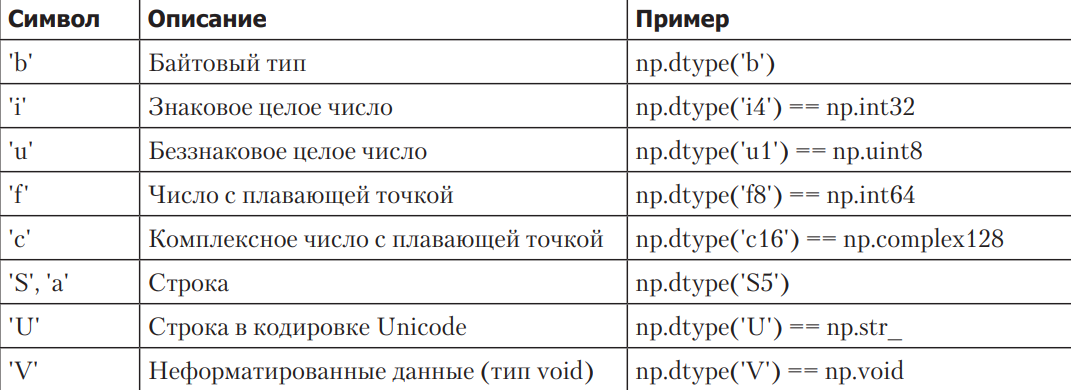

Библиотека предоставляет возможность создавать более продвинутые типы данных. Можно создать тип, в котором каждый элемент содержит массив(в том числе многомерный)

In [160]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (4, 2, 2))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, 0.0]]])
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


Библиотека NumPy предоставляет класс np.recarray, практически идентичный только что описанным структурированным массивам, но с одной дополнительной возможностью: доступ к полям можно осуществлять как к атрибутам, а не только как к ключам словаря.

In [161]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

In [162]:
data['age']

array([25, 45, 37, 19], dtype=int32)

Но подобное представление структурированных записей значительно замедляет работу с ними на большом объёме данных, взамен предлагая чуть более удобный синтаксис